# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/WeatherPy/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

638


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Build query URL and request results in Fahrenheit.

# Base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
# set up lists to hold reponse info
city_name = []
cloudiness = []
country =[]
date = []
humidity =[]
lat = []
lng = []
maxtemp = []
windspeed = []

# variable to count the number of cities. This is used to stop calling the API after data for 500 cities are available,
# to avoid API call rate limits
count_city = 0

# count variables used to avoid api call rate limits
count_record = 0
count_set = 1

print("Beginning Data Retrieval")     
print("-----------------------------")

# Loop through the list of cities and perform a request for data on each city
for city in cities:
    
#   To avoid api call rate limits, get city weather data in sets of 50 cities, then sleep for 5 seconds 
    count_record = count_record + 1
    if count_record == 51:
        count_record = 1
        count_set = count_set + 1
        time.sleep(5)
    
#   To avoid api call rate limits, if the data for 500+ cities are available, break from the loop 
    if count_city > 500:
        break
        
    response = requests.get(query_url + city).json()
    
#   Append the required details to the corresponding lists for the cities, if available in the OpenWeatherMap API
    try:
#       Append the required lists    
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        windspeed.append(response["wind"]["speed"])
        
#       counter to break the for loop when the data for 500+ cities are available    
        count_city = count_city + 1
        
#       Print on console for city found        
        print(f"Processing Record {count_record} of Set {count_set} | {city}")

# Handle exceptions for citites that are not available in the OpenWeatherMap API
    except:
        # Print on console for city not found
        print("City not found. Skipping...")
        pass
    
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | avera
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | namibe
Processing Record 7 of Set 1 | gumdag
Processing Record 8 of Set 1 | esperance
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | dunedin
Processing Record 11 of Set 1 | vestmannaeyjar
Processing Record 12 of Set 1 | vila velha
Processing Record 13 of Set 1 | hermanus
City not found. Skipping...
Processing Record 15 of Set 1 | maraa
Processing Record 16 of Set 1 | kysyl-syr
Processing Record 17 of Set 1 | itaquyry
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | auki
Processing Record 22 of Set 1 | victoria
Processing Record 23 of Set 1 | touros
Processing Record 24 of Set 1 | r

Processing Record 5 of Set 5 | jerico
Processing Record 6 of Set 5 | whitianga
Processing Record 7 of Set 5 | gizo
Processing Record 8 of Set 5 | oranjemund
Processing Record 9 of Set 5 | terra santa
Processing Record 10 of Set 5 | asau
Processing Record 11 of Set 5 | narsaq
Processing Record 12 of Set 5 | sibolga
Processing Record 13 of Set 5 | lagoa
Processing Record 14 of Set 5 | carsamba
City not found. Skipping...
Processing Record 16 of Set 5 | tezu
City not found. Skipping...
Processing Record 18 of Set 5 | karratha
Processing Record 19 of Set 5 | port keats
Processing Record 20 of Set 5 | zhezkazgan
Processing Record 21 of Set 5 | ihosy
Processing Record 22 of Set 5 | tasiilaq
Processing Record 23 of Set 5 | yuanping
Processing Record 24 of Set 5 | pitimbu
City not found. Skipping...
Processing Record 26 of Set 5 | tautira
Processing Record 27 of Set 5 | jacmel
Processing Record 28 of Set 5 | gao
Processing Record 29 of Set 5 | ayacucho
Processing Record 30 of Set 5 | severo-ku

Processing Record 12 of Set 9 | broken hill
City not found. Skipping...
Processing Record 14 of Set 9 | olafsvik
Processing Record 15 of Set 9 | lompoc
Processing Record 16 of Set 9 | grindavik
Processing Record 17 of Set 9 | rawlins
Processing Record 18 of Set 9 | saint-philippe
Processing Record 19 of Set 9 | uyuni
Processing Record 20 of Set 9 | tomatlan
Processing Record 21 of Set 9 | da nang
Processing Record 22 of Set 9 | proletarsk
Processing Record 23 of Set 9 | richards bay
Processing Record 24 of Set 9 | hasaki
Processing Record 25 of Set 9 | hohhot
Processing Record 26 of Set 9 | chany
Processing Record 27 of Set 9 | constitucion
City not found. Skipping...
Processing Record 29 of Set 9 | klaksvik
Processing Record 30 of Set 9 | waitati
Processing Record 31 of Set 9 | bambous virieux
Processing Record 32 of Set 9 | lensk
Processing Record 33 of Set 9 | half moon bay
Processing Record 34 of Set 9 | lagos
Processing Record 35 of Set 9 | kolondieba
Processing Record 36 of Set 9

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create a dataframe to store the weather data of the 500+ cities
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": maxtemp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": windspeed,
    "Country": country,
    "Date": date,
}

weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ilulissat,69.2167,-51.1000,28.42,64,100,5.75,GL,1665622909
1,Albany,42.6001,-73.9662,61.21,67,100,4.00,US,1665622909
2,Mataura,-46.1927,168.8643,56.73,43,3,3.69,NZ,1665622909
3,Avera,33.1940,-82.5271,68.38,98,100,12.97,US,1665622910
4,Nikolskoye,59.7035,30.7861,39.09,83,66,2.64,RU,1665622910
...,...,...,...,...,...,...,...,...,...
496,Preobrazheniye,42.9019,133.9064,56.91,61,100,7.09,RU,1665623080
497,San Cristobal,7.7669,-72.2250,69.98,95,97,2.35,VE,1665623080
498,Linjiang,41.8069,126.9078,54.79,62,100,2.75,CN,1665623081
499,Nuuk,64.1835,-51.7216,29.01,86,40,14.97,GL,1665622836


In [8]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02
mean,20.728813,16.090326,60.157924,72.433134,57.091816,7.506267,1.665623e+09
std,33.965422,91.796956,18.225535,20.132313,42.559506,5.444594,7.872184e+01
min,-54.800000,-175.200000,5.950000,13.000000,0.000000,0.000000,1.665623e+09
25%,-8.345000,-68.514500,47.530000,62.000000,8.000000,3.380000,1.665623e+09
50%,26.550000,22.681400,62.890000,78.000000,74.000000,6.260000,1.665623e+09
75%,48.782300,95.960900,74.910000,86.000000,100.000000,10.360000,1.665623e+09
max,78.218600,179.316700,96.570000,100.000000,100.000000,33.460000,1.665623e+09


In [9]:
# Export the data to a csv file, with a header for the index and the columns in the required order
weather_data.to_csv(output_data_file,index_label="City_ID",
                    columns=["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"],
                    encoding="utf-8")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# Identify the cities with a humidity greater than 100%. The next 2 steps are commented as there are no results for this query.
humidity_gt_100 = weather_data[(weather_data["Humidity"] > 100)]
humidity_gt_100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [11]:
#  Get the indices of cities that have humidity over 100%.
#humidity_gt_100.index

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#clean_city_data = weather_data.drop(humidity_gt_100.index,inplace=False)
#clean_city_data

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

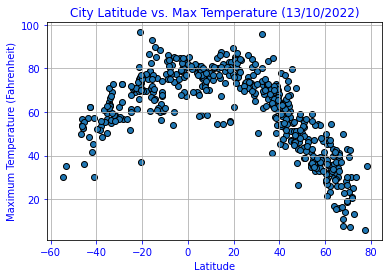

In [13]:
# Build a scatter plot for Latitude Vs. Humidity
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({pd.Timestamp.today().strftime('%d/%m/%Y')})",color="blue")
plt.ylabel("Maximum Temperature (Fahrenheit)",color="blue")
plt.xlabel("Latitude",color="blue")
plt.tick_params(color = "blue", labelcolor="blue")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WeatherPy/City_Latitude_vs_Max_Temperature_" + str(pd.Timestamp.today().strftime('%d-%m-%Y')) + ".png",dpi=300)

# Show plot
plt.show()

The temperature seem to peek around latitude of 0 and tends to drop when the latitude values increase or decrease.

## Latitude vs. Humidity Plot

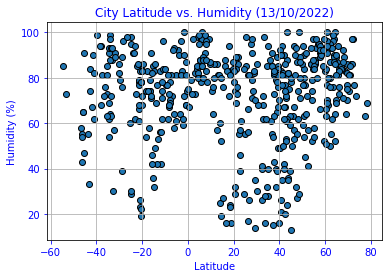

In [14]:
# Build a scatter plot for Latitude Vs. Max Temperature
plt.scatter(weather_data["Lat"], weather_data["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({pd.Timestamp.today().strftime('%d/%m/%Y')})",color="blue")
plt.ylabel("Humidity (%)",color="blue")
plt.xlabel("Latitude",color="blue")
plt.tick_params(color = "blue", labelcolor="blue")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WeatherPy/City_Latitude_vs_Humidity_" + str(pd.Timestamp.today().strftime('%d-%m-%Y')) + ".png",dpi=300)

# Show plot
plt.show()

The humidity% seem to be high at the latitude of 0. It also seem to be high at the extreme north or south. However, there is no particular trend with the increase or decrease of the latitude values. So there may or may not be any relationship between humidity and latitude. Further tests like correlation coefficient is required to confirm this. 

## Latitude vs. Cloudiness Plot

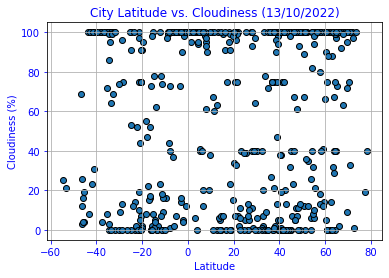

In [15]:
# Build a scatter plot for Latitude Vs. Humidity
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({pd.Timestamp.today().strftime('%d/%m/%Y')})",color="blue")
plt.ylabel("Cloudiness (%)",color="blue")
plt.xlabel("Latitude",color="blue")
plt.tick_params(color = "blue", labelcolor="blue")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WeatherPy/City_Latitude_vs_Cloudiness_" + str(pd.Timestamp.today().strftime('%d-%m-%Y')) + ".png",dpi=300)

# Show plot
plt.show()

There scatter plot shows that there is no relationship between the Latitude and Cloudiness.

## Latitude vs. Wind Speed Plot

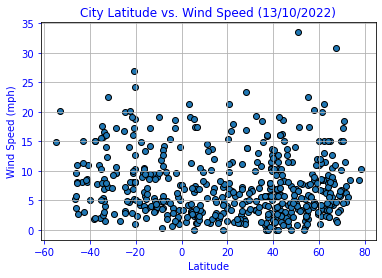

In [16]:
# Build a scatter plot for Latitude Vs. Humidity
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({pd.Timestamp.today().strftime('%d/%m/%Y')})",color="blue")
plt.ylabel("Wind Speed (mph)",color="blue")
plt.xlabel("Latitude",color="blue")
plt.tick_params(color = "blue", labelcolor="blue")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WeatherPy/City_Latitude_vs_Wind Speed_" + str(pd.Timestamp.today().strftime('%d-%m-%Y')) + ".png",dpi=300)

# Show plot
plt.show()

Similar to Cloudiness, the Wind Speed also seem to have no relationship with Latitude.

## Linear Regression

In [17]:
# Create dataframe for Northern Hemisphere
n_hemisphere_weather = weather_data[(weather_data["Lat"] >= 0)]
n_hemisphere_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ilulissat,69.2167,-51.1000,28.42,64,100,5.75,GL,1665622909
1,Albany,42.6001,-73.9662,61.21,67,100,4.00,US,1665622909
3,Avera,33.1940,-82.5271,68.38,98,100,12.97,US,1665622910
4,Nikolskoye,59.7035,30.7861,39.09,83,66,2.64,RU,1665622910
6,Gumdag,39.2061,54.5906,63.54,49,5,10.45,TM,1665622910
...,...,...,...,...,...,...,...,...,...
496,Preobrazheniye,42.9019,133.9064,56.91,61,100,7.09,RU,1665623080
497,San Cristobal,7.7669,-72.2250,69.98,95,97,2.35,VE,1665623080
498,Linjiang,41.8069,126.9078,54.79,62,100,2.75,CN,1665623081
499,Nuuk,64.1835,-51.7216,29.01,86,40,14.97,GL,1665622836


In [18]:
# Create dataframe for Southern Hemisphere
s_hemisphere_weather = weather_data[(weather_data["Lat"] < 0)]
s_hemisphere_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Mataura,-46.1927,168.8643,56.73,43,3,3.69,NZ,1665622909
5,Mossamedes,-15.1961,12.1522,69.39,85,100,3.71,AO,1665622910
7,Esperance,-33.8667,121.9000,55.69,64,95,16.58,AU,1665622910
9,Dunedin,-45.8742,170.5036,52.81,65,16,11.01,NZ,1665622911
11,Vila Velha,-20.3297,-40.2925,73.53,84,7,10.27,BR,1665622882
...,...,...,...,...,...,...,...,...,...
480,Luangwa,-15.6167,30.4167,71.73,42,0,1.99,ZM,1665623076
481,Kalabo,-14.9700,22.6814,70.52,32,78,6.04,ZM,1665623077
486,Masuguru,-11.3667,38.4167,67.96,78,0,4.36,TZ,1665623078
488,Chota,-6.5500,-78.6500,54.21,92,37,1.86,PE,1665623079


In [19]:
# Create a function to calculate the Linear Regression 
def linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos):

    slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    print(f"The r-squared value is: {rvalue**2}")
    
    correlation = st.pearsonr(x_values, y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.title(f"{hemisphere} Hemisphere ({pd.Timestamp.today().strftime('%d/%m/%Y')}) \n {y_label} vs. {x_label} Linear Regression",color="blue")
    plt.xlabel(f"{x_label}",color="blue")
    plt.ylabel(f"{y_label}",color="blue")
    plt.tick_params(color = "blue", labelcolor="blue")

    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(text_pos),fontsize=15,color="red")
    
    plt.savefig(f"output_data/WeatherPy/{hemisphere}_Hemisphere_{y_label}_vs_{x_label}_Linear_Regression_{str(pd.Timestamp.today().strftime('%d-%m-%Y'))}.png",dpi=300)

    plt.show()
    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.7324517557682214
The correlation between both factors is -0.86


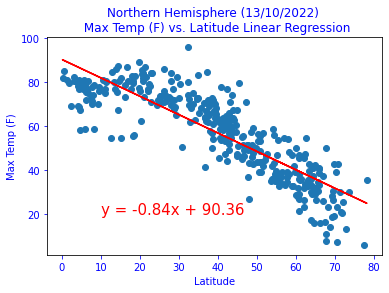

In [20]:
x_values = n_hemisphere_weather["Lat"]
y_values = n_hemisphere_weather["Max Temp"]
hemisphere = "Northern"
x_label = "Latitude"
y_label = "Max Temp (F)"
text_pos = (10,20)

linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.5216973344100164
The correlation between both factors is 0.72


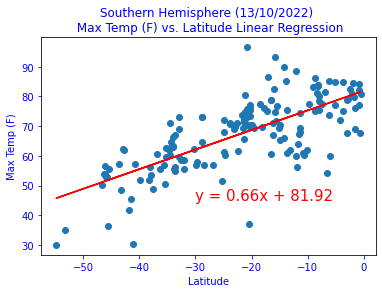

In [22]:
x_values = s_hemisphere_weather["Lat"]
y_values = s_hemisphere_weather["Max Temp"]
hemisphere = "Southern"
x_label = "Latitude"
y_label = "Max Temp (F)"
text_pos = (-30,45)

linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos)

The Correlation coefficient between the Latitude and Max Temp is strong negative for the northen hemisphere whereas it is strong for the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.007572149410935198
The correlation between both factors is 0.09


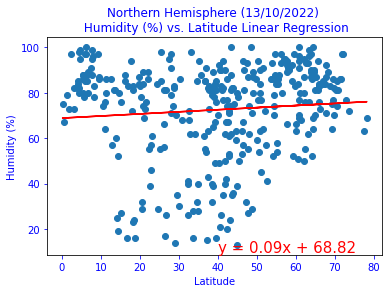

In [23]:
x_values = n_hemisphere_weather["Lat"]
y_values = n_hemisphere_weather["Humidity"]
hemisphere = "Northern"
x_label = "Latitude"
y_label = "Humidity (%)"
text_pos = (40,10)

linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.0008302016304559846
The correlation between both factors is 0.03


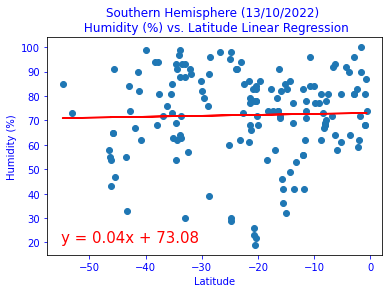

In [24]:
x_values = s_hemisphere_weather["Lat"]
y_values = s_hemisphere_weather["Humidity"]
hemisphere = "Southern"
x_label = "Latitude"
y_label = "Humidity (%)"
text_pos = (-55,20)

linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos)

Based on the Correlation coefficient, humidity in both northern and southern hemispheres have a very week / no reltionship with the Latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.006067445539427789
The correlation between both factors is 0.08


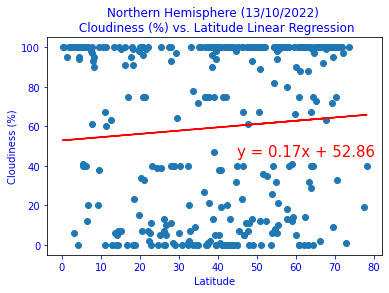

In [25]:
x_values = n_hemisphere_weather["Lat"]
y_values = n_hemisphere_weather["Cloudiness"]
hemisphere = "Northern"
x_label = "Latitude"
y_label = "Cloudiness (%)"
text_pos = (45,45)

linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.0002352926785179985
The correlation between both factors is 0.02


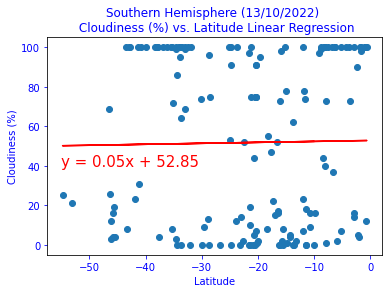

In [27]:
x_values = s_hemisphere_weather["Lat"]
y_values = s_hemisphere_weather["Cloudiness"]
hemisphere = "Southern"
x_label = "Latitude"
y_label = "Cloudiness (%)"
text_pos = (-55,40)

linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos)

Similar to Humidity, based on the Correlation coefficient, Cloudiness in both the northern and southern hemispheres have a very week / no reltionship with Latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.008210379888886466
The correlation between both factors is 0.09


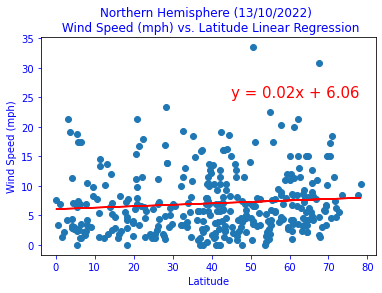

In [29]:
x_values = n_hemisphere_weather["Lat"]
y_values = n_hemisphere_weather["Wind Speed"]
hemisphere = "Northern"
x_label = "Latitude"
y_label = "Wind Speed (mph)"
text_pos = (45,25)

linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.02462638877122198
The correlation between both factors is -0.16


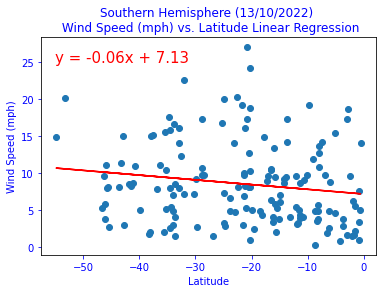

In [30]:
x_values = s_hemisphere_weather["Lat"]
y_values = s_hemisphere_weather["Wind Speed"]
hemisphere = "Southern"
x_label = "Latitude"
y_label = "Wind Speed (mph)"
text_pos = (-55,25)

linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos)

Similar to Humidity and Cloudiness, based on the Correlation coefficient, Wind Speed in both the northern and southern hemispheres have a very week / no reltionship with Latitude.

## Observable Trends

1) The maximum temperature around the equator (Latitude 0) is higher and there is drop in temperature when as we move farther away from the equator both in the Northern and Southern Hemispheres.

2) Looking at the plots, Humidity seem to be higher at the equator and at the poles and widely spread in the mid regions of the Northern and Southern Hemispheres. However, the correlation coefficient values show that that is no / very week relationship between Humidity and Latitude.

3) The Wind Speed is under 25mph throughout irrespective of the Latitude. The Correlation coefficent value also suggests that there is no relationship between the Wind Speed and Latitude.

4) There are no observable patterns or trends in the Latitude Vs Cloudiness plots.